<a href="https://colab.research.google.com/github/Qibzz/water-quality-classification-knn/blob/main/klasifikasi_kualitas_air_dengan_algoritma_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn  import metrics
from sklearn.metrics import classification_report, confusion_matrix

Load Data

In [2]:
df = pd.read_csv('/content/water_potability.csv')

Cek dan handling Missing value

In [5]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [6]:
# Melihat persentase missing value per kolom
df.isnull().sum() / len(df) * 100

,0
ph,0.0
Hardness,0.0
Solids,0.0
Chloramines,0.0
Sulfate,0.0
Conductivity,0.0
Organic_carbon,0.0
Trihalomethanes,0.0
Turbidity,0.0
Potability,0.0


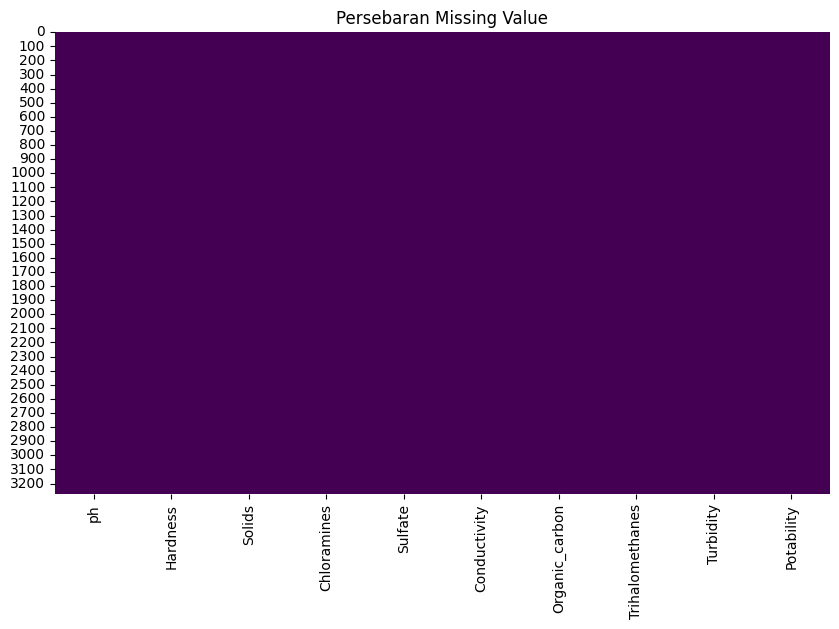

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Persebaran Missing Value')
plt.show()

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
# Pisahkan fitur (X) dan target (Y)
x = df.drop('Potability', axis=1)
y = df['Potability']

In [11]:
#X dan Y adalah numpy arrays
print("\nType of X is:", type(x))


Type of X is: <class 'pandas.core.frame.DataFrame'>


In [13]:
#menampilkan 5 baris pertama
print("\nFirst 5 rows of X:\n", x[:5])


First 5 rows of X:
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  


In [16]:
# 4. Scaling (WAJIB UNTUK KNN)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
# splitting x dan y untuk jadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [22]:
#tampilkan data fitur latih dan data uji
print(x_train.shape)
print(x_test.shape)


(2620, 9)
(656, 9)


In [23]:
#tampilkan data target latih dan data uji
print(y_train.shape)
print(y_test.shape)

(2620,)
(656,)


In [24]:
# pelatihan pada data latih menggunakan KNN (knn=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# melakukan prediksi dengan data uji
y_predict = knn.predict(x_test)

In [29]:
#perbandingan nilai aktual (y_test) dan nilai prediksi (y_prediksi)
print("Akurasi model KNN:", metrics.accuracy_score(y_test, y_predict))

Akurasi model KNN: 0.6310975609756098


In [42]:
#prediksi menggunakan data sampel dibuat sendiri
contoh_df = pd.DataFrame(contoh, columns=x.columns)
contoh_scaled = scaler.transform(contoh_df) #data latih td discaling maka data ini harus disclaing jugak
preds = knn.predict(contoh_scaled)
print('Prediksi:', preds)

Prediksi: [0 0]


In [43]:
#prediksi menggunakan data sampel dibuat sendiri
contoh_df = pd.DataFrame(contoh, columns=x.columns)
contoh_scaled = scaler.transform(contoh_df) #data latih td discaling maka data ini harus disclaing jugak
preds = knn.predict(contoh_scaled)
print('Prediksi:', preds)

## Menampilkan hasil per sampel urut
for hasil in preds:
    if hasil == 0:
        print("Tidak Layak Minum")
    else:
        print("Layak Minum")



Prediksi: [0 0]
Tidak Layak Minum
Tidak Layak Minum


melakukan elbow bertujuan untuk mencari nilai 'K' (jumlah tetangga) yang paling optimal agar akurasi model K-NN setinggi mungkin (atau error-nya serendah mungkin).

In [53]:
# Mencari K Terbaik (Elbow Method)
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

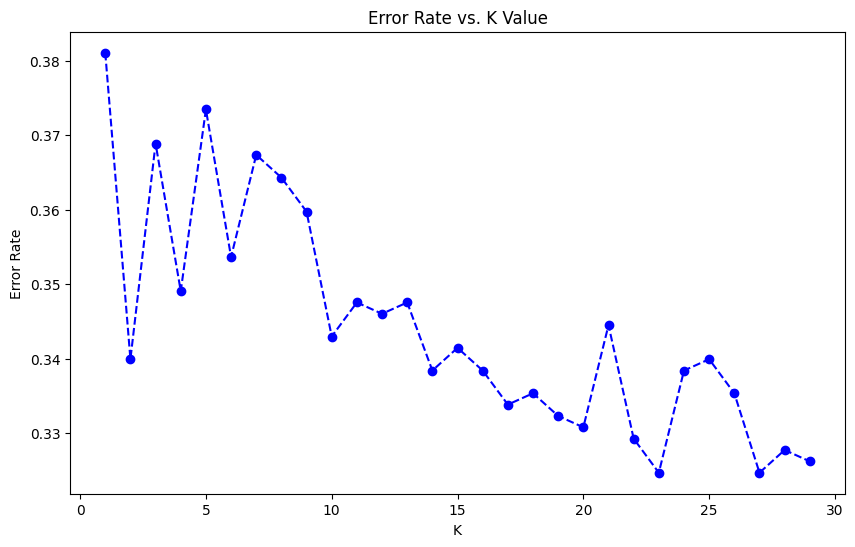

In [45]:
# Plotting Elbow
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Final Model Training & Inference

In [54]:
# Training dengan K Terpilih (bisa diambil dari titik paling optimal di grafik)
knn_final = KNeighborsClassifier(n_neighbors=23)
knn_final.fit(x_train, y_train)
predictions = knn_final.predict(x_test)

In [56]:
# Training dengan K Terpilih (bisa diambil dari titik paling optimal di grafik)
knn_final = KNeighborsClassifier(n_neighbors=23)
knn_final.fit(x_train, y_train)
predictions = knn_final.predict(x_test)

print(predictions)

[0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

              precision    recall  f1-score   support

           0       0.68      0.90      0.78       412
           1       0.64      0.29      0.40       244

    accuracy                           0.68       656
   macro avg       0.66      0.60      0.59       656
weighted avg       0.67      0.68      0.64       656



<Axes: >

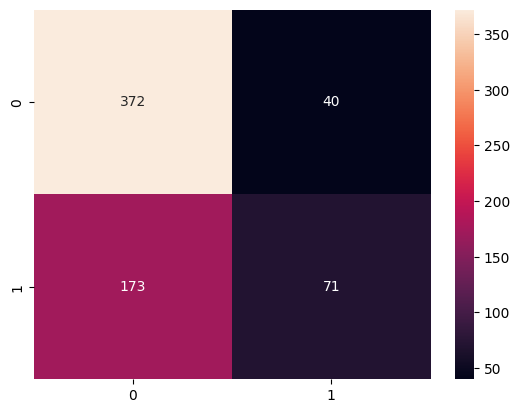

In [55]:
# Evaluasi
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')

In [58]:
#saving the model
import joblib
joblib.dump(knn_final, 'knn_model.pkl')
print("Model berhasil disimpan! Siap untuk deployment.")

Model berhasil disimpan! Siap untuk deployment.
